In [1]:
# pip install numpy pandas tensorflow matplotlib seaborn plotly

In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
sns.set_style(style = "darkgrid")
from keras.utils import plot_model

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input 
from tensorflow.keras.applications.inception_v3 import preprocess_input as pre_in_incv3
from tensorflow.keras.applications.densenet import preprocess_input as pre_in_dne
from tensorflow.keras.applications.vgg16 import preprocess_input as pre_in_vgg

2024-04-09 14:42:57.905914: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-09 14:42:57.906288: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 14:42:57.922835: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 14:42:58.175783: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 14:42:59.080327: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [3]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator()

In [4]:

train_path = '13-12-23 Concise Model/6-12-23 data preprocessing/train'

In [5]:

test_path = '13-12-23 Concise Model/6-12-23 data preprocessing/test'

In [6]:
image_size = 150

In [7]:
train_generator = image_generator.flow_from_directory(
        train_path,
        target_size=(image_size, image_size),
        batch_size=128,
        class_mode='categorical')

Found 0 images belonging to 4 classes.


In [8]:
val_generator = image_generator.flow_from_directory(
        test_path,
        target_size=(image_size, image_size),
        batch_size=128,
        class_mode='categorical')

Found 0 images belonging to 4 classes.


In [9]:
number_of_epochs = 10

In [10]:
number_of_classes = 4

In [11]:
def schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [12]:
image_generator_resnet50 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

In [13]:
train_generator_resnet50 = image_generator_resnet50.flow_from_directory(
        train_path,
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical')

Found 0 images belonging to 4 classes.


In [14]:
val_generator_resnet50 = image_generator_resnet50.flow_from_directory(
        test_path,
        target_size=(image_size, image_size),
        batch_size=32,
        class_mode='categorical')

Found 0 images belonging to 4 classes.


/home/kapil/Documents/Sem 8/Subjects/AAI/Mini Project/Final/resnetnotebook/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning:

Skipping variable loading for optimizer 'rmsprop', because it has 216 variables whereas the saved optimizer has 7 variables. 



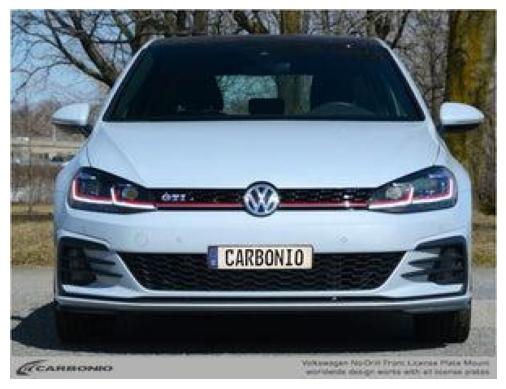

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Volkswagen


In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model_path = 'resnet50_model.keras'  # Update with your model's path
saved_model = load_model(model_path)

# Function to preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    return img_array

# Function to predict the class of the input image
def predict_image_class(img_path, model):
    img_array = preprocess_image(img_path)
    # Assuming you're using the same preprocessing function as training
    # preprocess_input is not needed if you're using the same preprocessing function as during training
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    return predicted_class_index

# Path to the input image for testing
input_image_path = r'input cars/polo1.jpeg'  # Update with the image path you want to test

# Display the input image
input_image = image.load_img(input_image_path)
plt.imshow(input_image)
plt.axis('off')
plt.show()

# Predict the class of the input image
predicted_class_index = predict_image_class(input_image_path, saved_model)

# Display the prediction result
class_labels = train_generator.class_indices
predicted_class_label = list(class_labels.keys())[predicted_class_index]
print("Predicted class:", predicted_class_label)
